# Bài 1
Khởi tạo dữ liệu với:
- # số điểm trong mỗi class: : 100
- # số chiều: 2
- # số class: 3 và không có hai class nào là linearly separable
Hãy viết chương trình tính:
- Feedforward và Backpropagation sử dụng softmax là activation function, in kết
quả sau 1000 vòng lặp, giả sử learning rate= 1, unit trong hiden layer = 100
- Thay đổi units trong hidden layer là d1 = 5, 10, 15, 20 và trực quan hóa kết quả

Training model with 5 hidden units...
Epoch 0: Loss = 1.3267355009613087
Epoch 100: Loss = 0.5402027757561814
Epoch 200: Loss = 0.33792054019322354
Epoch 300: Loss = 0.2779373952440402
Epoch 400: Loss = 0.2046539997885643
Epoch 500: Loss = 0.18424011196860793
Epoch 600: Loss = 0.17618082740961913
Epoch 700: Loss = 0.1575592179454468
Epoch 800: Loss = 0.1518049197385739
Epoch 900: Loss = 0.14071198175402597


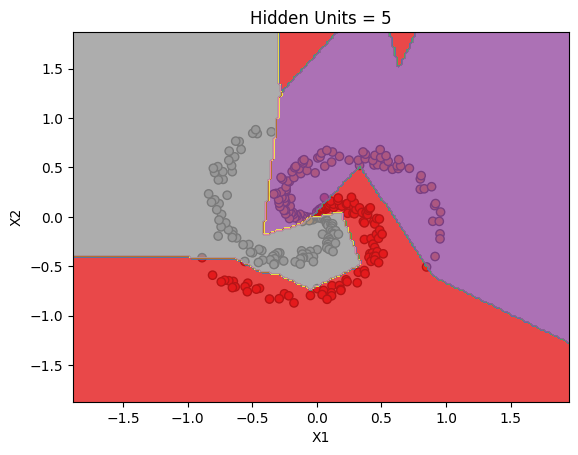

Training model with 10 hidden units...
Epoch 0: Loss = 1.5950922856729175
Epoch 100: Loss = 0.3314976720765897
Epoch 200: Loss = 0.2004140753041067
Epoch 300: Loss = 0.14989278557523192
Epoch 400: Loss = 0.1211513364276447
Epoch 500: Loss = 0.10341534911717397
Epoch 600: Loss = 0.0913964561417976
Epoch 700: Loss = 0.08228596154394889
Epoch 800: Loss = 0.07541576030070511
Epoch 900: Loss = 0.07002828823954949


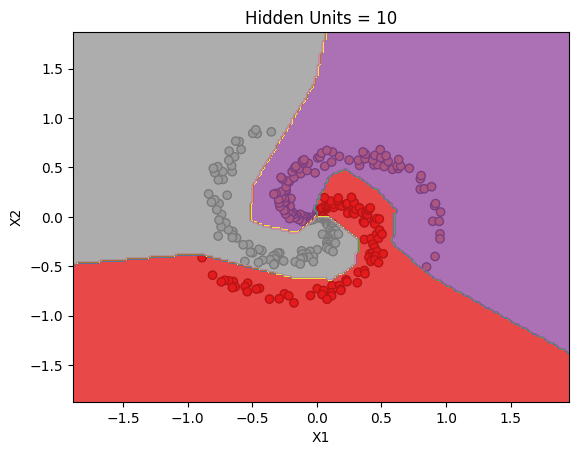

Training model with 15 hidden units...
Epoch 0: Loss = 2.5611453712533034
Epoch 100: Loss = 0.3250847090114506
Epoch 200: Loss = 0.25398633169209317
Epoch 300: Loss = 0.20704615445327576
Epoch 400: Loss = 0.17330206718273294
Epoch 500: Loss = 0.1475091231057855
Epoch 600: Loss = 0.12745720319379245
Epoch 700: Loss = 0.10670795700413421
Epoch 800: Loss = 0.09031546074162963
Epoch 900: Loss = 0.07961635206866893


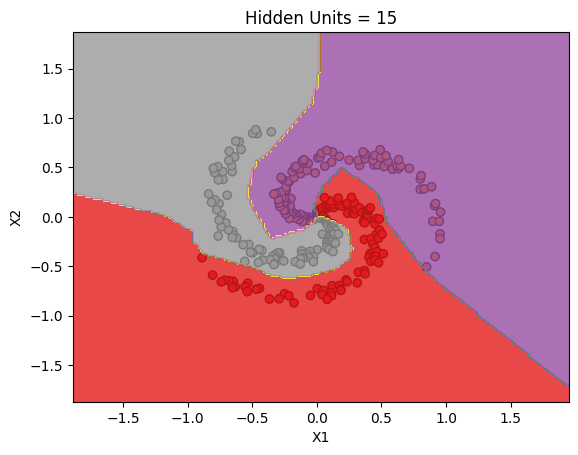

Training model with 20 hidden units...
Epoch 0: Loss = 1.1264423509134915
Epoch 100: Loss = 0.2144125457224296
Epoch 200: Loss = 0.14064602445627872
Epoch 300: Loss = 0.10845951306679323
Epoch 400: Loss = 0.09063516884456947
Epoch 500: Loss = 0.07879076818364492
Epoch 600: Loss = 0.07063499795335106
Epoch 700: Loss = 0.06439225647898034
Epoch 800: Loss = 0.059625673252550894
Epoch 900: Loss = 0.055805842843526285


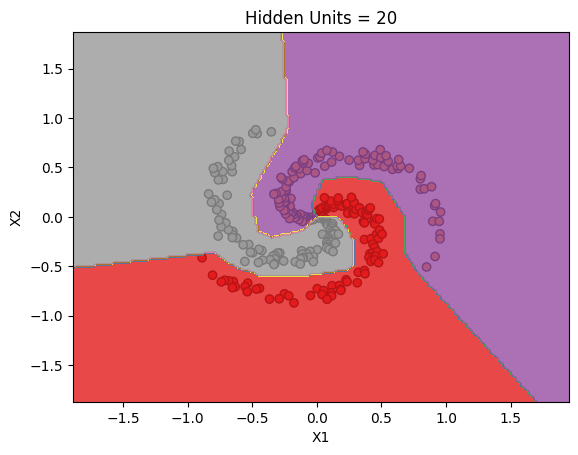

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Khởi tạo dữ liệu
np.random.seed(0)
num_points = 100
num_classes = 3
num_features = 2

# Tạo dữ liệu ngẫu nhiên không linearly separable
X = np.zeros((num_points*num_classes, num_features))
y = np.zeros(num_points*num_classes, dtype='uint8')
for class_num in range(num_classes):
    ix = range(num_points*class_num, num_points*(class_num+1))
    r = np.linspace(0.0, 1, num_points)  # Bán kính từ 0 đến 1
    t = np.linspace(class_num*4, (class_num+1)*4, num_points) + np.random.randn(num_points)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = class_num

# Hàm softmax
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Hàm mất mát Cross-Entropy
def cross_entropy_loss(y_pred, y_true):
    num_samples = y_pred.shape[0]
    probs = y_pred[range(num_samples), y_true]
    log_probs = -np.log(probs)
    loss = np.sum(log_probs) / num_samples
    return loss

# Hàm train
def train(X, y, learning_rate, num_epochs, hidden_units):
    num_samples = X.shape[0]
    num_features = X.shape[1]
    num_classes = np.max(y) + 1

    # Khởi tạo trọng số ngẫu nhiên
    W1 = np.random.randn(num_features, hidden_units)
    b1 = np.zeros(hidden_units)
    W2 = np.random.randn(hidden_units, num_classes)
    b2 = np.zeros(num_classes)

    # Huấn luyện mô hình
    for epoch in range(num_epochs):
        # Feedforward
        hidden_layer = np.maximum(0, np.dot(X, W1) + b1)  # ReLU activation
        scores = np.dot(hidden_layer, W2) + b2
        y_pred = softmax(scores)

        # Tính độ mất mát
        loss = cross_entropy_loss(y_pred, y)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss}")

        # Backpropagation
        grad_scores = y_pred
        grad_scores[range(num_samples), y] -= 1
        grad_scores /= num_samples

        grad_W2 = np.dot(hidden_layer.T, grad_scores)
        grad_b2 = np.sum(grad_scores, axis=0)

        grad_hidden = np.dot(grad_scores, W2.T)
        grad_hidden[hidden_layer <= 0] = 0  # ReLU derivative

        grad_W1 = np.dot(X.T, grad_hidden)
        grad_b1 = np.sum(grad_hidden, axis=0)

        # Cập nhật trọng số
        W1 -= learning_rate * grad_W1
        b1 -= learning_rate * grad_b1
        W2 -= learning_rate * grad_W2
        b2 -= learning_rate * grad_b2

    return W1, b1, W2, b2

# Thực hiện huấn luyện mô hình
learning_rate = 1
num_epochs = 1000
hidden_units = [5, 10, 15, 20]

for units in hidden_units:
    print(f"Training model with {units} hidden units...")
    W1, b1, W2, b2 = train(X, y, learning_rate, num_epochs, units)

    # Trực quan hóa kết quả
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    hidden_layer = np.maximum(0, np.dot(grid_points, W1) + b1)
    scores = np.dot(hidden_layer, W2) + b2
    y_pred = np.argmax(scores, axis=1)

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    plt.contourf(xx, yy, y_pred.reshape(xx.shape), alpha=0.8, cmap=plt.cm.Set1)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Hidden Units = {units}")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


# Câu 2
Sử dụng thư viện keras và tensorflow xây dựng một mạng MLP cho bộ dữ liệu iris (đã có
trên group chung) theo cấu trúc sau:
* Xây dựng mô hình với 3 lớp ẩn (hidden layer):
 * Layer 1: 20 neural, activation = relu
 * Layer 2: 10 neural, activation = sigmod
 * Layer 3: 8 neural, activation = relu
* Output: activation = sigmod
* Optimizer= Adam
* Metrics=['accuracy‘]
* Epochs=150, batch_size=10
* Lưu mô hình và so sánh kết quả với các mô hình học máy hôm trước đã thực hiện.
Nhận xét kết quả


In [2]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Tải tập dữ liệu iris
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode các nhãn
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình mạng neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
epochs = 150
batch_size = 10

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/150
12/12 [==============================] - 1s 3ms/step - loss: 1.4859 - accuracy: 0.3333
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 1.3232 - accuracy: 0.3333
Epoch 3/150
12/12 [==============================] - 0s 3ms/step - loss: 1.2253 - accuracy: 0.5583
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 1.1383 - accuracy: 0.3417
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0892 - accuracy: 0.3250
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0565 - accuracy: 0.3250
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0241 - accuracy: 0.3833
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0012 - accuracy: 0.5833
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 0.9738 - accuracy: 0.6583
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 0.9360 - accuracy: 0.5667
Epoch 11/